In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

def custom_tanh(x):
    return (K.exp(x) - K.exp(-x)) / (K.exp(x) + K.exp(-x))
def custom_relu(x):
    return K.maximum(0.0, x)
def custom_sigmoid(x):
    return 1 / (1 + K.exp(-x))

model = Sequential([ Dense(64, input_shape=(10,)), Activation(custom_relu),
                     Dense(64), Activation(custom_tanh),
                     Dense(1), Activation(custom_sigmoid) ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

np.random.seed(0)
X_train = np.random.random((100, 10))
Y_train = np.random.randint(2, size=(100, 1))
history = model.fit(X_train, Y_train, epochs=10, batch_size=10)

predictions = model.predict(X_train[:5])
print("Predictions:\n", predictions)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
 activation_5 (Activation)   (None, 1)                 0         
                                                                 
Total params: 4929 (19.25 KB)
Trainable params: 4929 (

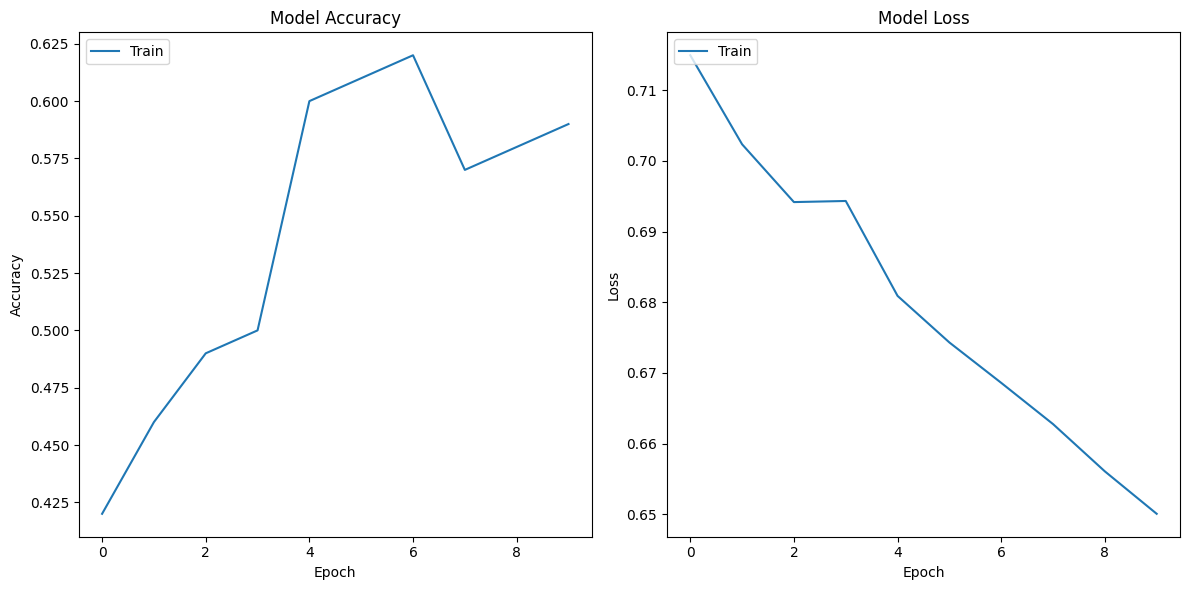

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper left')

plt.tight_layout()
plt.show()